In [199]:
# ! pip install pandas


In [200]:
# ! pip install xarray

In [201]:
# ! pip install openpyxl --upgrade

In [202]:
# ! pip install chardet

In [238]:
import chardet
import numpy as np 

with open('expenses202204_202303.csv', 'rb') as file:
    result = chardet.detect(file.read())

encoding = result['encoding']

with open('expenses202204_202303.csv', 'r', encoding=encoding) as file:
    # process the file
    df = pd.read_csv(file, delimiter=',')
    


In [239]:
df.keys()

Index(['Date', 'Transaction type', 'Description', 'class', 'Paid out',
       'Paid in', 'Balance'],
      dtype='object')

In [240]:
df

,Date,Transaction type,Description,class,Paid out,Paid in,Balance
0,23-Mar-23,Transfer from,070040 08926334,NaN,NaN,"£2,000.00","£2,010.93"
1,07-Jan-23,Transfer to,070116 36145138,regular,£90.00,NaN,"£6,546.48"
2,04-Feb-23,Transfer to,070116 36145138,regular,£120.00,NaN,"£4,363.80"
3,03-Mar-23,Transfer to,070116 36145138,regular,£120.00,NaN,"£2,035.65"
4,28-Mar-23,Transfer to,070116 36145138,regular,£120.00,NaN,"£1,194.97"
...,...,...,...,...,...,...,...
1678,28-Jul-22,Contactless Payment,ZTL*Paper and Pixel Creat London GB APPLEPAY 9556,shop,£20.00,NaN,"£177,930.95"
1679,22-Jul-22,Contactless Payment,ZTL*Perinelli Salami London GB,food,£7.50,NaN,"£207,474.98"
1680,24-Oct-22,Visa purchase,ZTL*PICKS ORGANIC FARM LT Leicester GB,food,£4.56,NaN,"£10,582.17"
1681,06-Sept-22,Contactless Payment,ZTL*Svalbard Catering As Longyearbyen NO 20.00...,cafe,£1.75,NaN,"£45,582.96"


In [241]:
df['Transaction type']=='CH&CO CATERING LONDON GB'

0       False
1       False
2       False
3       False
4       False
        ...  
1678    False
1679    False
1680    False
1681    False
1682    False
Name: Transaction type, Length: 1683, dtype: bool

In [242]:
# Remove commas from column 3
df['Paid out'] = df['Paid out'].str.replace(',', '')
df['Paid out'] = df['Paid out'].str.replace('£', '')
# Convert column 3 to float
df['Paid out'] = df['Paid out'].astype(float)


In [243]:
# define a lambda function to abbreviate strings to 5 characters
abbreviate = lambda x: x[:7]

# apply the abbreviation function to the 'description' column and create a new column 'desc_abbrev'
df['Desc_abbrev'] = df['Description'].apply(abbreviate)


In [244]:
sums = df.groupby('Desc_abbrev')['Paid out'].sum()

In [245]:
# averages = df.groupby('Desc_abbrev')['Paid out'].mean()

In [246]:
sums[140:180]

Desc_abbrev
Fig & O      12.60
Fortnum      42.28
Fulham      154.00
GAILS -       8.40
GALAXIA      13.65
GALAXY       17.69
GARBES        5.15
GARNASH       9.19
GATHER      157.12
GEORGES     152.76
GERAKID      44.38
GEROKOS      15.43
GITHUB        6.62
GOOD EN    1212.00
GOOGLE       79.99
GREATER      19.40
GREEN A       6.40
H M NEW      38.42
H&M Hen      28.98
HALIFAX    5539.37
HEATHRO      87.00
HOLLYBU      35.48
HOME ET       7.11
HOMEBAS       9.45
HSBC BA     119.94
I ORAIA      74.67
I-BANK      179.85
IERA MO      38.75
IKEA LT    1853.00
ILLY CA       2.80
INTERSP      38.14
ISMASH       48.00
ITSU 00      34.02
ITSU LT       2.19
IZ *HOL      35.00
IZ *LEV       6.00
IZ *PAC      16.00
IZ *PAP      20.00
IZ *SVA       2.18
Isle of      50.00
Name: Paid out, dtype: float64

In [247]:
# list_spent=[]
# for i in range(len(averages.keys())):
#     list_spent.append([averages.keys()[i],averages[averages.keys()[i]]])

list_spent=[]
for i in range(len(sums.keys())):
    list_spent.append([sums.keys()[i],sums[sums.keys()[i]]])

In [1]:
# np.asarray(list_spent)

In [249]:
# arr=np.asarray(list_spent)
# arr[:, 1] = arr[:, 1].astype(float)
# sorted_arr = arr[arr[:,1].argsort()[::-1]]


In [250]:
arr=np.asarray(list_spent)
indices = np.argsort(-arr[:, 1].astype(float))

# sort the entire array using the sorted indices
sorted_arr = arr[indices]

In [2]:
# sorted_arr

In [252]:
labels.shape

(15,)

In [254]:
sorted_arr.shape

(432, 2)

In [218]:
sums = df.groupby('class')['Paid out'].sum()

In [219]:
# list_spent=[]
# for i in range(len(averages.keys())):
#     list_spent.append([averages.keys()[i],averages[averages.keys()[i]]])

list_spent=[]
for i in range(len(sums.keys())):
    list_spent.append([sums.keys()[i],sums[sums.keys()[i]]])

In [220]:
arr=np.asarray(list_spent)
indices = np.argsort(-arr[:, 1].astype(float))

# sort the entire array using the sorted indices
sorted_arr = arr[indices]

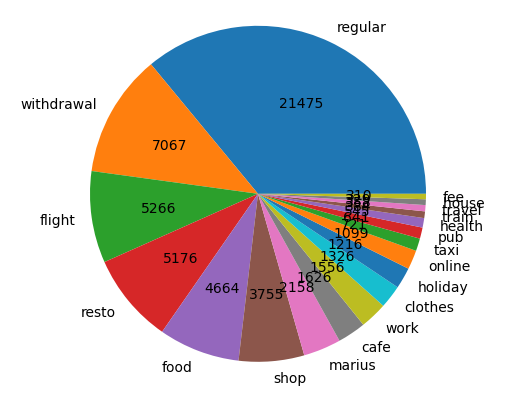

In [224]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Extract the two columns from the array
labels = sorted_arr[1:20, 0]
values = sorted_arr[1:20, 1].astype(float)

# Create the pie chart
plt.pie(values, labels=labels, autopct=lambda x: f'{x*np.sum(values)/100.:.0f}') #autopct='%1.1f%%')
plt.axis('equal')

plt.show()

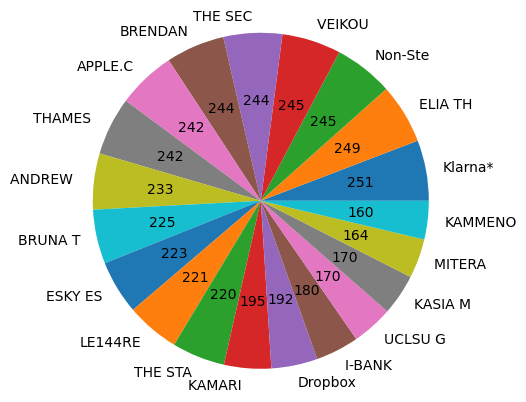

In [194]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


# Extract the two columns from the array
labels = sorted_arr[60:80, 0]
values = sorted_arr[60:80, 1].astype(float)

# Create the pie chart
plt.pie(values, labels=labels, autopct=lambda x: f'{x*np.sum(values)/100.:.0f}') #autopct='%1.1f%%')
plt.axis('equal')

plt.show()